In [1]:
import sys
import os
import time

sys.path.insert(0,'../../')
sys.path.insert(0,'../../py')

import parameters
import utilities
import spectrogram_utilities
import output_utilities
import spectrogram_output_visualiser
import spectrogram_cuts_db_creation

import numpy as np
import pandas as pd
import h5py


from scipy import signal
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
from sklearn import manifold
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# matplotlib.get_backend()
%matplotlib inline

awd_event = 1
site = parameters.sites[0]

## Training, Validation, and Testing set

In [3]:
# get all files from the site
files = utilities.all_files(awd_event, site)
np.random.shuffle(files)
# split files into training, validation, and test files using the ration of 70%-15%-15%
training_files = files[0:int(0.7*len(files))]
validation_files = files[int(0.7*len(files)):int(0.85*len(files))]
test_files = files[int(0.85*len(files)):]

print(len(files), len(training_files), len(validation_files), len(test_files))

2196 1537 329 330


## Database

### Creating database of whistlers and noise

In [4]:
# database_name='spectrogram_cuts.h5'
# spectrogram_cuts_db_creation.spectrogram_cuts_db(awd_event, site, training_files, database_name, verbose=True)

### Loading database

In [5]:
# data, probs, events, f_cut_length, t_cut_length = spectrogram_cuts_db_creation.load_spectrogram_cuts_db(awd_event, site, database_name='spectrogram_cuts.h5', verbose=True)

## Dimensionality Reduction

### Principal Component Analysis


Loading spectrogram cuts from database for awdEvent1/marion
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........
Runtime: 111.17 seconds
Eigenvalues:  [1.92214354e-02 6.93987448e-03 5.54264338e-03 ... 1.34832205e-05
 1.17237389e-05 1.15859771e-05]

Runtime: 159.89 seconds


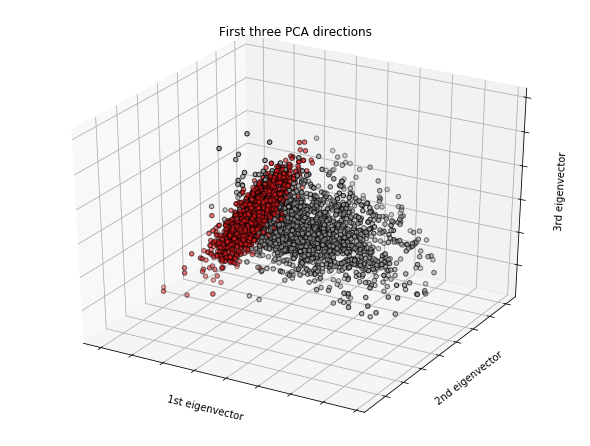

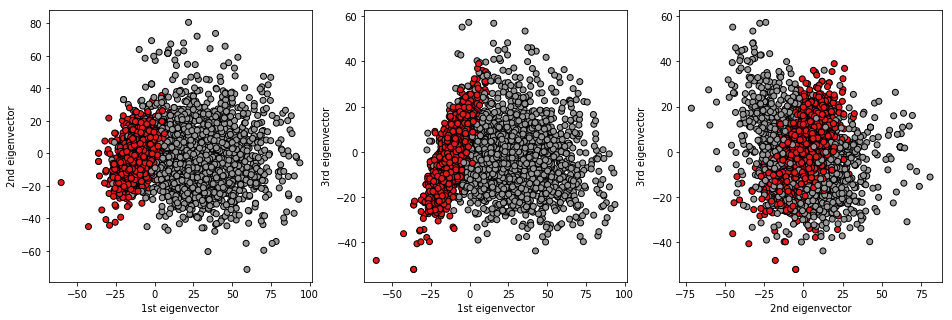

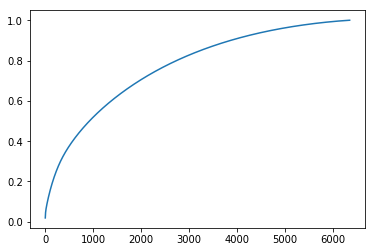

In [17]:
# PCA
from sklearn import preprocessing
data, probs, events, f_cut_length, t_cut_length = spectrogram_cuts_db_creation.load_spectrogram_cuts_db(awd_event, site, database_name='spectrogram_cuts.h5', verbose=True)


# np.random.shuffle(data)
data = preprocessing.scale(data)

# take portion of the data
data = data[:int(len(data)/5)]
events = events[:len(data)]


start = time.time()
pca = PCA(0.99999)
data = pca.fit_transform(data)
end = time.time()

print("Eigenvalues: ", pca.explained_variance_ratio_)
print("\nRuntime: {:.2f} seconds".format(end - start))

data = np.asarray(data, dtype=np.float32)
data = np.vstack(data[:])

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(data[:, 0], data[:, 1], data[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=20, c=events)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.scatter(data[:, 0], data[:, 1], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.subplot(1,3,2)
plt.scatter(data[:, 0], data[:, 2], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("1st eigenvector")
plt.ylabel("3rd eigenvector")
plt.subplot(1,3,3)
plt.scatter(data[:, 1], data[:, 2], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("2nd eigenvector")
plt.ylabel("3rd eigenvector")

plt.figure()
plt.plot(pca.explained_variance_ratio_.cumsum())

plt.show()

### Kernel Component Analysis
#### Cosine Kernel 


Loading spectrogram cuts from database for awdEvent1/marion
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........
Runtime: 37.46 seconds
Eigenvalues:  [1.30575648e+02 4.51434658e+01 3.82844500e+01 ... 2.70526047e-18
 7.43159420e-19 2.09261131e-19]
Runtime: 85.78 seconds


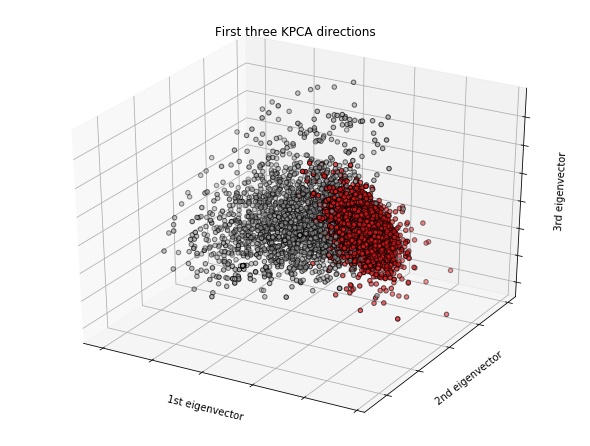

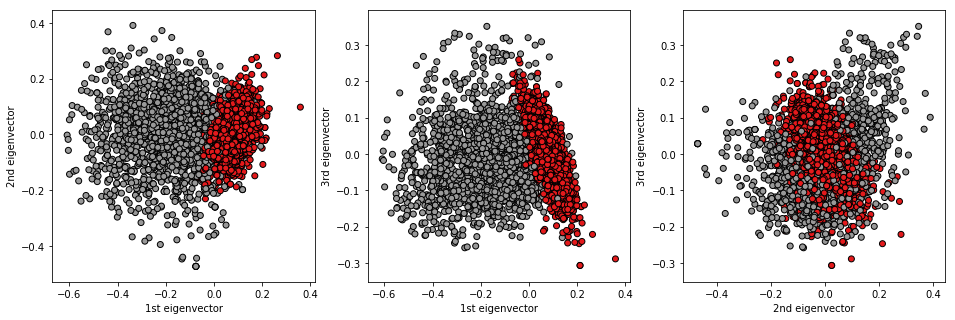

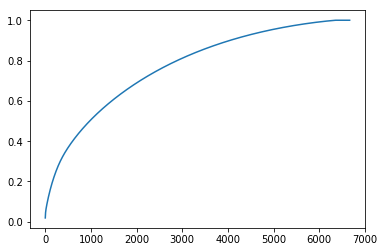

In [7]:
# KPCA
from sklearn import preprocessing
data, probs, events, f_cut_length, t_cut_length = spectrogram_cuts_db_creation.load_spectrogram_cuts_db(awd_event, site, database_name='spectrogram_cuts.h5', verbose=True)

# take portion of the data
data = data[:int(len(data)/5)]
events = events[:len(data)]

data = preprocessing.scale(data)

start = time.time()
kernel = KernelPCA(kernel="cosine", fit_inverse_transform=True)
data = kernel.fit_transform(data)
end = time.time()

print("Eigenvalues: ", kernel.lambdas_)
print("Runtime: {:.2f} seconds".format(end - start))

data = np.asarray(data, dtype=np.float32)
data = np.vstack(data[:])

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(data[:, 0], data[:, 1], data[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=20,c=events)
ax.set_title("First three KPCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.scatter(data[:, 0], data[:, 1], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.subplot(1,3,2)
plt.scatter(data[:, 0], data[:, 2], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("1st eigenvector")
plt.ylabel("3rd eigenvector")
plt.subplot(1,3,3)
plt.scatter(data[:, 1], data[:, 2], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("2nd eigenvector")
plt.ylabel("3rd eigenvector")

plt.figure()
plt.plot(np.var(data, axis=0).cumsum()/np.sum(np.var(data, axis=0)))

plt.show()

#### Polynomial Kernel


Loading spectrogram cuts from database for awdEvent1/marion
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........
Runtime: 38.23 seconds

 Eigenvalues:  [4.32032422e+02 1.58744482e+02 1.24344101e+02 ... 6.46499678e-18
 2.32591721e-18 7.90903463e-19]

Runtime: 93.86 seconds


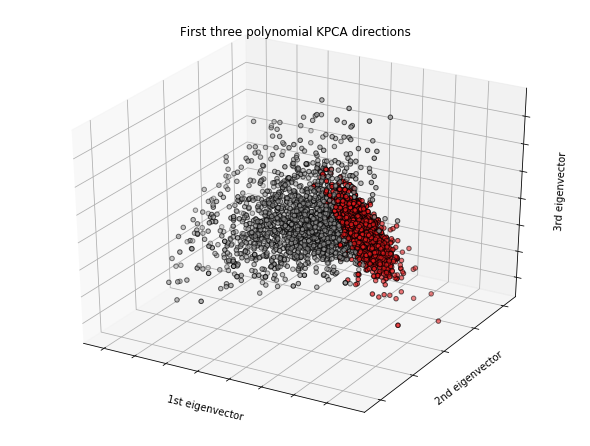

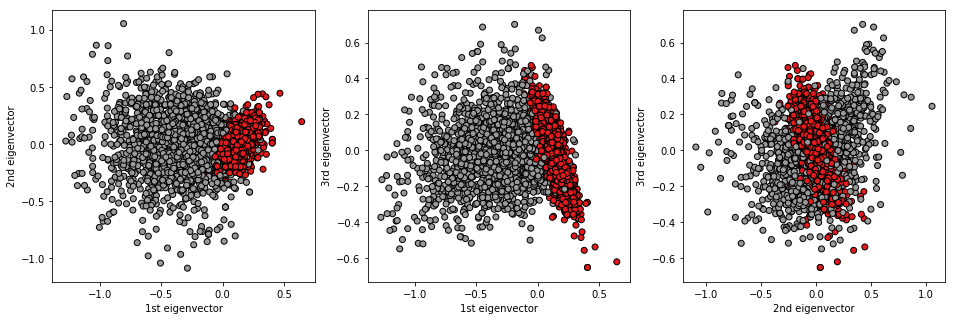

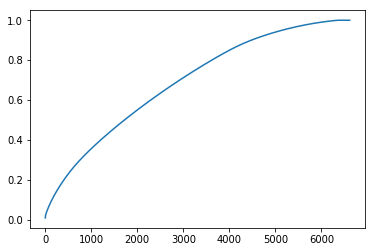

In [4]:
# KPCA
from sklearn import preprocessing
data, probs, events, f_cut_length, t_cut_length = spectrogram_cuts_db_creation.load_spectrogram_cuts_db(awd_event, site, database_name='spectrogram_cuts.h5', verbose=True)

# take portion of the data
data = data[:int(len(data)/5)]
events = events[:len(data)]

data = preprocessing.scale(data)

start = time.time()
kernel = KernelPCA(kernel="poly", fit_inverse_transform=True)
data = kernel.fit_transform(data)
end = time.time()

print("\n Eigenvalues: ", kernel.lambdas_)
print("\nRuntime: {:.2f} seconds".format(end - start))

data = np.asarray(data, dtype=np.float32)
data = np.vstack(data[:])

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(data[:, 0], data[:, 1], data[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=20,c=events)
ax.set_title("First three polynomial KPCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.scatter(data[:, 0], data[:, 1], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.subplot(1,3,2)
plt.scatter(data[:, 0], data[:, 2], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("1st eigenvector")
plt.ylabel("3rd eigenvector")
plt.subplot(1,3,3)
plt.scatter(data[:, 1], data[:, 2], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("2nd eigenvector")
plt.ylabel("3rd eigenvector")

plt.figure()
plt.plot(np.var(data, axis=0).cumsum()/np.sum(np.var(data, axis=0)))

plt.show()

#### Sigmoid Kernel


Loading spectrogram cuts from database for awdEvent1/marion
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........
Runtime: 36.81 seconds

 Eigenvalues:  [5.23022782e+01 1.90995155e+01 1.51975185e+01 ... 3.61122089e-19
 1.07474211e-19 6.22601076e-20]

Runtime: 82.09 seconds


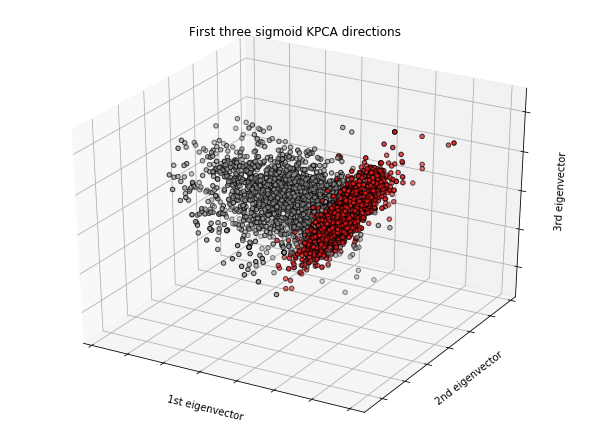

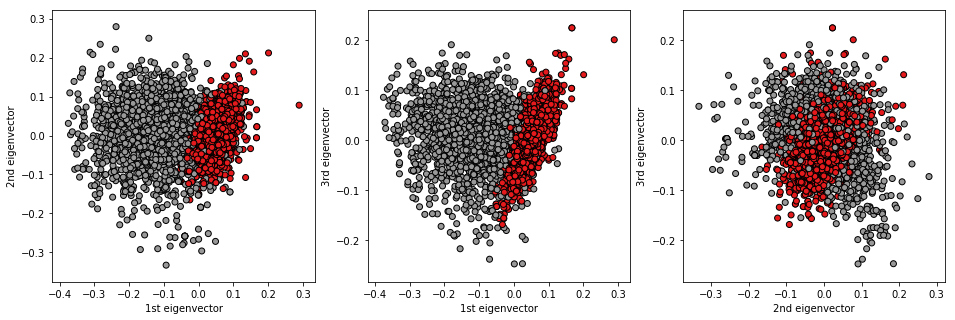

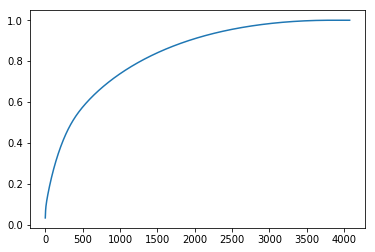

In [5]:
from sklearn import preprocessing
data, probs, events, f_cut_length, t_cut_length = spectrogram_cuts_db_creation.load_spectrogram_cuts_db(awd_event, site, database_name='spectrogram_cuts.h5', verbose=True)

# take portion of the data
data = data[:int(len(data)/5)]
events = events[:len(data)]

data = preprocessing.scale(data)

start = time.time()
kernel = KernelPCA(kernel="sigmoid", fit_inverse_transform=True)
data = kernel.fit_transform(data)
end = time.time()

print("\n Eigenvalues: ", kernel.lambdas_)
print("\nRuntime: {:.2f} seconds".format(end - start))

data = np.asarray(data, dtype=np.float32)
data = np.vstack(data[:])

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(data[:, 0], data[:, 1], data[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=20,c=events)
ax.set_title("First three sigmoid KPCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.scatter(data[:, 0], data[:, 1], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.subplot(1,3,2)
plt.scatter(data[:, 0], data[:, 2], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("1st eigenvector")
plt.ylabel("3rd eigenvector")
plt.subplot(1,3,3)
plt.scatter(data[:, 1], data[:, 2], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("2nd eigenvector")
plt.ylabel("3rd eigenvector")

plt.figure()
plt.plot(np.var(data, axis=0).cumsum()/np.sum(np.var(data, axis=0)))

plt.show()

#### RBF Kernel


Loading spectrogram cuts from database for awdEvent1/marion
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........
Runtime: 36.93 seconds

 Eigenvalues:  [9.41587272e+01 3.65533335e+01 1.27400264e+01 ... 3.71781590e-17
 1.72161592e-17 9.23930496e-18]

Runtime: 87.27 seconds


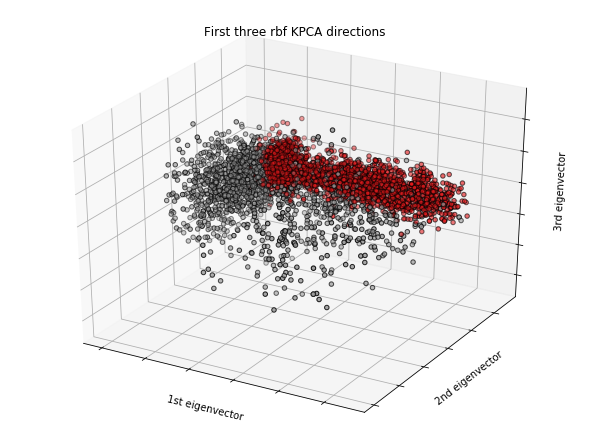

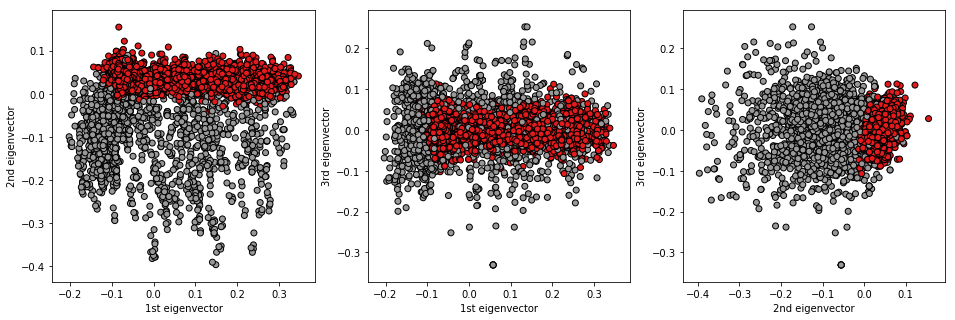

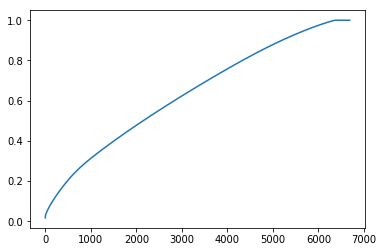

In [6]:
from sklearn import preprocessing
data, probs, events, f_cut_length, t_cut_length = spectrogram_cuts_db_creation.load_spectrogram_cuts_db(awd_event, site, database_name='spectrogram_cuts.h5', verbose=True)

# take portion of the data
data = data[:int(len(data)/5)]
events = events[:len(data)]

data = preprocessing.scale(data)

start = time.time()
kernel = KernelPCA(kernel="rbf", fit_inverse_transform=True)
data = kernel.fit_transform(data)
end = time.time()

print("\n Eigenvalues: ", kernel.lambdas_)
print("\nRuntime: {:.2f} seconds".format(end - start))

data = np.asarray(data, dtype=np.float32)
data = np.vstack(data[:])

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(data[:, 0], data[:, 1], data[:, 2],
           cmap=plt.cm.Set1, edgecolor='k', s=20,c=events)
ax.set_title("First three rbf KPCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.scatter(data[:, 0], data[:, 1], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.subplot(1,3,2)
plt.scatter(data[:, 0], data[:, 2], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("1st eigenvector")
plt.ylabel("3rd eigenvector")
plt.subplot(1,3,3)
plt.scatter(data[:, 1], data[:, 2], cmap=plt.cm.Set1,edgecolor='k',c=events)
plt.xlabel("2nd eigenvector")
plt.ylabel("3rd eigenvector")

plt.figure()
plt.plot(np.var(data, axis=0).cumsum()/np.sum(np.var(data, axis=0)))

plt.show()